# Phase 1 : Hidden Letter Detection (Motion-Based)


**Step 1:**  Read frames from video_with_letters.mp4

In [1]:
import cv2

cap = cv2.VideoCapture('video_with_letters.mp4') # open video in this path

ret , first_frame = cap.read()
# ret is a boolean variable that returns true if the frame is available.
# first_frame is the actual image frame (as a NumPy array) from the video.

**Step 2:** Convert frames to grayscale

**Step 3:** Use frame differencing + contrast enhancement

**Step 4:** Apply motion filtering: skip frames with motion ratio > 5% as it would be too noisy

**Step 5:** Save binary difference masks to a folder motion_frames


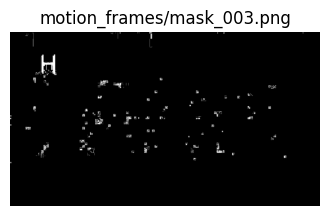

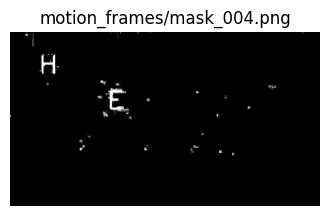

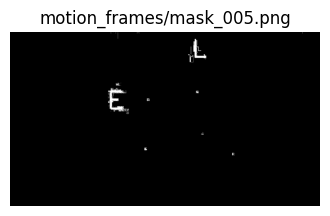

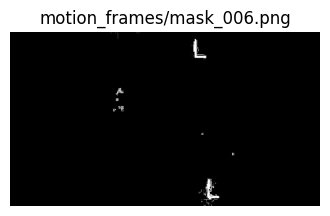

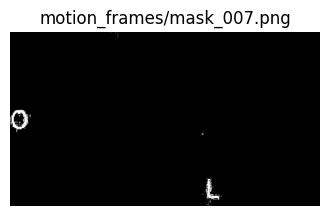

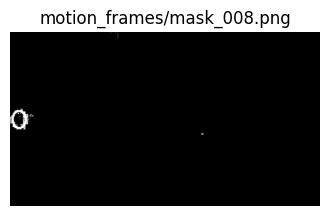

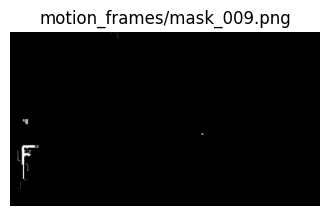

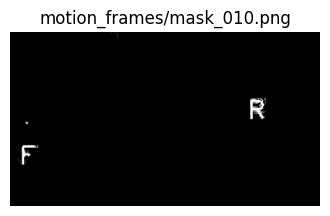

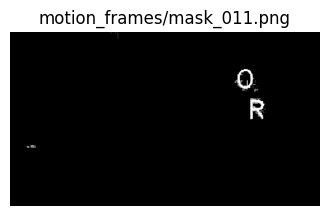

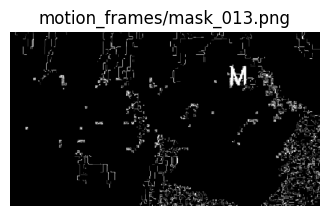

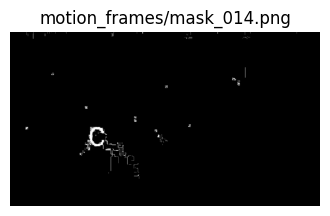

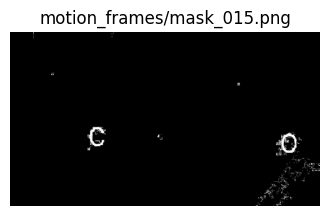

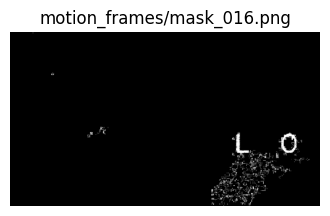

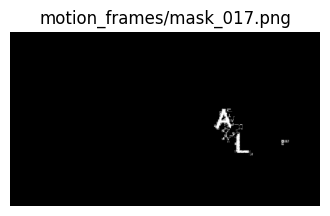

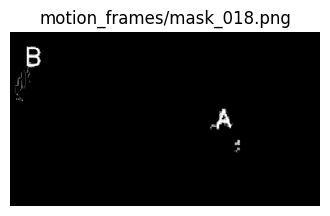

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt


# convert 1st frame to grayscale // needed in step 2
first_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
first_gray = cv2.equalizeHist(first_gray)

saved_masks = []
frame_idx = 1

threshold_value = 25     # pixel diff threshold //needed in step 3
motion_threshold = 0.05  # skip if >5% motion // needed in step 4
# Create output directory for masks // needed in step 5
os.makedirs('motion_frames', exist_ok=True)

while True:

    ret, frame = cap.read()
    if not ret: break

    # Step 2 : convert to Grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Step 3 : Frame differencing +  Contrast enhancement using histogram equalization

    diff = cv2.absdiff(gray, first_gray)
    diff = cv2.equalizeHist(diff)  # Enhance contrast of the difference image
    _, mask = cv2.threshold(diff, threshold_value, 255, cv2.THRESH_BINARY)

    # Step 4 : Motion ratio
    motion_ratio = np.count_nonzero(mask) / mask.size
    if motion_ratio <= motion_threshold: # if less than 5% : save
        # Step 5 : Save binary difference mask to the folder 'motion_frames'
        out_file = f'motion_frames/mask_{frame_idx:03d}.png'
        cv2.imwrite(out_file, mask)
        saved_masks.append(out_file)

    # update previous_grayscale frame and index
    first_gray = gray
    frame_idx += 1

cap.release()

# Display ALL masks inline to reveal letters
for m in saved_masks:
    img = cv2.imread(m, cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(4,4))
    plt.imshow(img, cmap='gray')
    plt.title(m)
    plt.axis('off')

**Message hidden :** Hello From Colab

# Phase 2 : Audio Extraction

**Step 1** : Read the audio file

In [3]:
# Install required libraries
!pip install --quiet moviepy noisereduce soundfile

# Extract audio from the video
import moviepy.editor as mp

video_path = "/content/video_with_audio.mp4"
audio_path = "audio_extracted.wav"

clip = mp.VideoFileClip(video_path)
clip.audio.write_audiofile(audio_path, logger=None)  # extract audio

  if event.key is 'enter':



**Step 2** : Apply a noise reduction filter to the audio file.


In [4]:
import noisereduce as nr
import soundfile as sf

# Load audio
data, rate = sf.read(audio_path)

# If stereo, convert to mono by averaging channels
if len(data.shape) > 1: data = data.mean(axis=1)

# Use first second as noise sample
noise_sample = data[:rate]

# Reduce noise using legacy API (positional args)
denoised = nr.reduce_noise(y=data, sr=rate, y_noise=noise_sample)

**Step 3** : Save the modified audio file

In [5]:
# Save denoised audio
denoised_path = "audio_denoised.wav"
sf.write(denoised_path, denoised, rate)

# Phase 3 :  Simulating Interlaced Video Scanning + BONUS

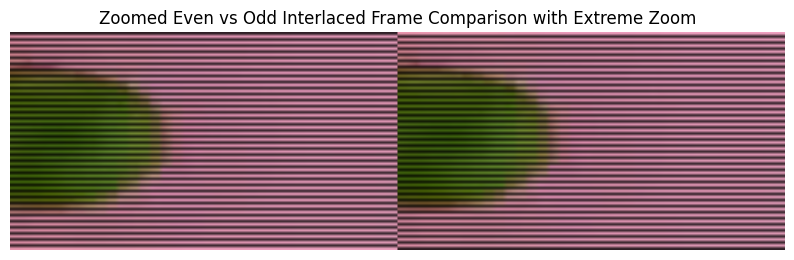

Side-by-side comparison saved as /mnt/data/extreme_zoom_interlaced_frame_comparison.png
Odd field interlaced video saved as /mnt/data/video_odd_interlaced.mp4
Even field interlaced video saved as /mnt/data/video_even_interlaced.mp4
Flicker effect video saved as /mnt/data/video_flicker_effect.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files

# Load the video
video_path = '/content/video_with_audio.mp4'
cap = cv2.VideoCapture(video_path)

# Function to apply stronger interlacing effect with increased contrast
def apply_stronger_interlacing(frame, odd_field=True):
    # Increase the effect by making alternate rows more extreme
    if odd_field:
        frame[::2, :] = frame[::2, :] * 0.2  # Darken even rows (odd field) more strongly
    else:
        frame[1::2, :] = frame[1::2, :] * 0.2  # Darken odd rows (even field) more strongly
    return frame

# Function to create the zoom effect (crop and upscale to zoom in at a specific point)
def apply_zoom_effect_at_point(frame, zoom_factor=0.1, crop_center=True):
    h, w = frame.shape[:2]

    # Define the region to crop (center or a specific region)
    if crop_center:
        # Crop from the center of the image
        crop_size = int(min(h, w) * zoom_factor)  # Crop to a specific zoom factor
        start_x = (w - crop_size) // 2
        start_y = (h - crop_size) // 2
        cropped_frame = frame[start_y:start_y+crop_size, start_x:start_x+crop_size]
    else:
        # You can specify other regions if necessary, e.g., a specific part of the image
        cropped_frame = frame[100:300, 100:300]  # Example of cropping a specific area

    # Upscale the cropped frame back to the original size
    zoomed_frame = cv2.resize(cropped_frame, (w, h))
    return zoomed_frame

# Create empty lists to store frames for side-by-side comparison
odd_frames = []
even_frames = []

# Prepare the video writer objects to save the interlaced videos
output_path_odd = '/mnt/data/video_odd_interlaced.mp4'
output_path_even = '/mnt/data/video_even_interlaced.mp4'
output_path_flicker = '/mnt/data/video_flicker_effect.mp4'  # For flicker effect video

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for mp4
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create VideoWriter objects for both odd and even interlaced videos, and flicker effect
out_odd = cv2.VideoWriter(output_path_odd, fourcc, cap.get(cv2.CAP_PROP_FPS), (frame_width, frame_height))
out_even = cv2.VideoWriter(output_path_even, fourcc, cap.get(cv2.CAP_PROP_FPS), (frame_width, frame_height))
out_flicker = cv2.VideoWriter(output_path_flicker, fourcc, cap.get(cv2.CAP_PROP_FPS), (frame_width, frame_height))

# Process the frames
frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Apply stronger interlacing to each frame (odd and even fields)
    odd_frame = apply_stronger_interlacing(frame.copy(), odd_field=True)
    even_frame = apply_stronger_interlacing(frame.copy(), odd_field=False)

    # Apply extreme zoom effect at a specific point (center or region)
    zoomed_odd_frame = apply_zoom_effect_at_point(odd_frame, zoom_factor=0.1, crop_center=True)  # Extreme zoom (downscale by 10%)
    zoomed_even_frame = apply_zoom_effect_at_point(even_frame, zoom_factor=0.1, crop_center=True)  # Extreme zoom (downscale by 10%)

    # Create alternating scanline flicker effect: alternate odd/even frames
    if frame_count % 2 == 0:
        flicker_frame = odd_frame  # Use odd frame for this frame
    else:
        flicker_frame = even_frame  # Use even frame for this frame

    # Append frames for side-by-side comparison
    odd_frames.append(zoomed_odd_frame)
    even_frames.append(zoomed_even_frame)

    # Write the interlaced frames and flicker effect to the corresponding videos
    out_odd.write(odd_frame)
    out_even.write(even_frame)
    out_flicker.write(flicker_frame)

    frame_count += 1

# Release the video capture and writer objects
cap.release()
out_odd.release()
out_even.release()
out_flicker.release()

# Combine both frames side by side for comparison
combined_frame = np.hstack((odd_frames[0], even_frames[0]))

# Display the combined image using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(combined_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.title('Zoomed Even vs Odd Interlaced Frame Comparison with Extreme Zoom')
plt.show()

# Ensure the directory exists
output_dir = '/mnt/data'
os.makedirs(output_dir, exist_ok=True)

# Save the combined image as PNG
output_path = os.path.join(output_dir, 'extreme_zoom_interlaced_frame_comparison.png')
plt.imsave(output_path, cv2.cvtColor(combined_frame, cv2.COLOR_BGR2RGB))

print(f"Side-by-side comparison saved as {output_path}")
print(f"Odd field interlaced video saved as {output_path_odd}")
print(f"Even field interlaced video saved as {output_path_even}")
print(f"Flicker effect video saved as {output_path_flicker}")

# Provide download links for the saved files
files.download(output_path_odd)
files.download(output_path_even)
files.download(output_path_flicker)
files.download(output_path)
